In [137]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
#file to load
#Add your file path here
#_daily_stock_yahoo
stock_path = os.path.join("Resources","FB_daily_stock_yahoo.csv")
int_rate_path = os.path.join("Resources","FEDFUNDS.csv")

In [207]:
stock = pd.read_csv(stock_path)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [193]:
#The effective federal funds rate is the interest rate banks charge each other for overnight loans to meet their reserve requirements. 
#Also known as the federal funds rate, the effective federal funds rate is set by the Federal Open Market Committee, or FOMC. 
#The effective federal funds rate is the most influential interest rate in the nation’s economy. It affects employment, growth and inflation.
effr = pd.read_csv(int_rate_path)
effr["YYYY-MM"] = [x[:7] for x in effr["Date"]]
effr_grouped = effr.groupby("YYYY-MM").min()
effr_grouped.head()

,Date,Federal Funds Rate
YYYY-MM,,
2016-01,2016-01-01,0.34
2016-02,2016-02-01,0.38
2016-03,2016-03-01,0.36
2016-04,2016-04-01,0.37
2016-05,2016-05-01,0.37


In [192]:
#Get the average stock price per month
stock["YYYY-MM"] = [x[:7] for x in stock["Date"]]
stock_grouped = stock.groupby("YYYY-MM")
stock_monthly = pd.DataFrame(stock_grouped["Close"].mean())
# stock_monthly["Year Month"] = pd.to_datetime(stock_monthly.index)
stock_monthly.head()

,Close
YYYY-MM,
2017-01,126.817499
2017-02,133.830525
2017-03,139.408261
2017-04,142.965263
2017-05,150.234093


In [195]:
merge_table = pd.merge(stock_monthly, effr_grouped, left_index = True, right_index = True, how="inner")
merge_table

,Close,Date,Federal Funds Rate
YYYY-MM,,,
2017-01,126.817499,2017-01-01,0.65
2017-02,133.830525,2017-02-01,0.66
2017-03,139.408261,2017-03-01,0.79
2017-04,142.965263,2017-04-01,0.90
2017-05,150.234093,2017-05-01,0.91
2017-06,152.079545,2017-06-01,1.04
2017-07,160.532499,2017-07-01,1.15
2017-08,169.160000,2017-08-01,1.16
2017-09,170.591000,2017-09-01,1.15


In [197]:
# Obtain coordinates to plot graph
stock = merge_table[["Date", "Close","Federal Funds Rate"]]
stock.head()

,Date,Close,Federal Funds Rate
YYYY-MM,,,
2017-01,2017-01-01,126.817499,0.65
2017-02,2017-02-01,133.830525,0.66
2017-03,2017-03-01,139.408261,0.79
2017-04,2017-04-01,142.965263,0.90
2017-05,2017-05-01,150.234093,0.91


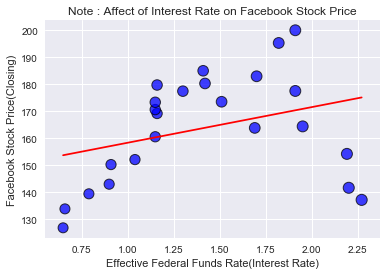

In [205]:
x = stock["Federal Funds Rate"]
y = stock ["Close"]
plt.scatter(x, y, linewidth=1, marker="o", facecolors="blue", edgecolors="black", s=x_axis, alpha=0.75)
plt.title('Note : Affect of Interest Rate on Facebook Stock Price')
plt.xlabel('Effective Federal Funds Rate(Interest Rate)')
plt.ylabel('Facebook Stock Price(Closing)')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = "red")

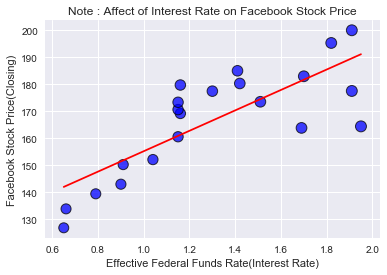

In [206]:
x_3 = stock.iloc[:-3,2]
y_3 = stock.iloc[:-3,1]
plt.scatter(x_3, y_3, linewidth=1, marker="o", facecolors="blue", edgecolors="black", s=x_axis, alpha=0.75)
plt.title('Note : Affect of Interest Rate on Facebook Stock Price')
plt.xlabel('Effective Federal Funds Rate(Interest Rate)')
plt.ylabel('Facebook Stock Price(Closing)')
plt.plot(np.unique(x_3), np.poly1d(np.polyfit(x_3, y_3, 1))(np.unique(x_3)), color = "red")